# Dataset

In [28]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

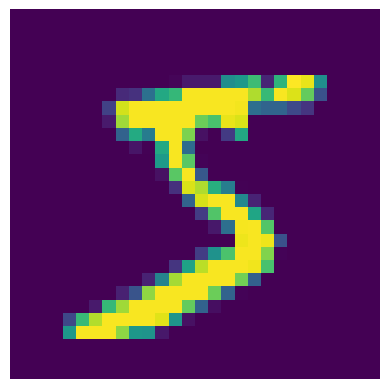

In [33]:
show(X_train[0])

In [34]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [35]:
X_train.dtype

dtype('uint8')

In [36]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model

In [37]:
from keras.models import Model
from keras.layers import Dense, Input

In [38]:
input = Input(shape = (X_train.shape[1]))
bottleneck = Dense(32, activation = 'relu', name = 'bottleneck')(input)
output = Dense(X_train.shape[1], activation = 'sigmoid', name = 'output')(bottleneck)

In [40]:
autoencoder = Model(input, output)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
encoder = Model(input, bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
decoder_input = Input(shape = (32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(decoder_input, decoder_layer(decoder_input))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25872 (101.06 KB)
Trainable params: 25872 (101.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and Eval

In [43]:
autoencoder.compile(loss = 'mse', optimizer = 'adam')
history = autoencoder.fit(X_train, X_train, epochs=18, batch_size = 128)

Epoch 1/18
469/469 [==============================] - 4s 3ms/step - loss: 0.0548
Epoch 2/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0258
Epoch 3/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0186
Epoch 4/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0151
Epoch 5/18
469/469 [==============================] - 1s 3ms/step - loss: 0.0130
Epoch 6/18
469/469 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 7/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0113
Epoch 8/18
469/469 [==============================] - 1s 3ms/step - loss: 0.0110
Epoch 9/18
469/469 [==============================] - 1s 3ms/step - loss: 0.0108
Epoch 10/18
469/469 [==============================] - 1s 3ms/step - loss: 0.0106
Epoch 11/18
469/469 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 12/18
469/469 [==============================] - 3s 5ms/step - loss: 0.0105
Epoch 13/18
469/469 [====

In [44]:
history.history.keys()

dict_keys(['loss'])

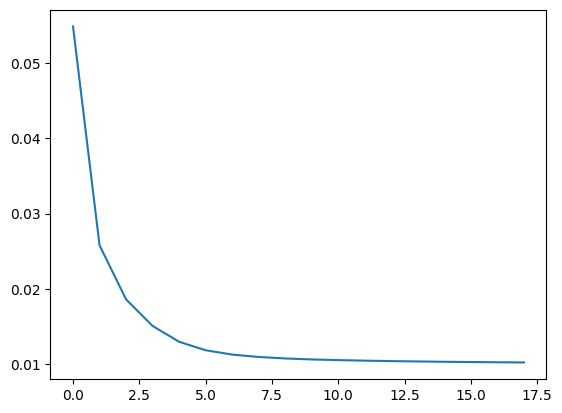

In [45]:
plt.plot(history.history['loss'])

In [46]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 [==============================] - 0s 4ms/step


(10000, 32)

In [47]:
output_data = decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 [==============================] - 0s 2ms/step


(10000, 784)

In [48]:
output_data = output_data.reshape(output_data.shape[0], 28, 28)
output_data.shape

(10000, 28, 28)

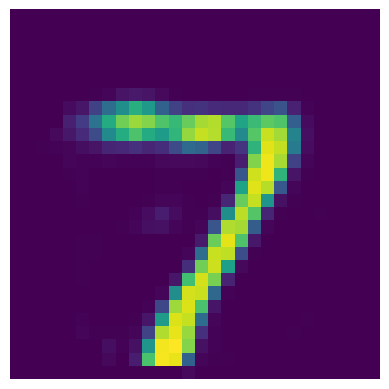

In [49]:
show(output_data[0])


In [50]:
X_test = X_test.reshape(10000, 28, 28)
X_test.shape

(10000, 28, 28)

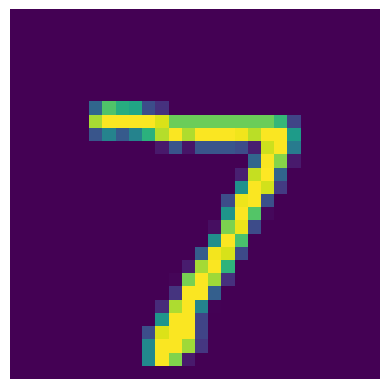

In [51]:
show(X_test[0])